<p style="font-weight:bold;font-size:200%">Token Price</p>

- Author: Yichen Luo
- Date 20220818

In [368]:
import time
import random
import numpy as np
import pandas as pd
from datetime import timezone
import datetime
import tweepy
import requests
import configparser
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import jellyfish
import os
from bs4 import BeautifulSoup
from IPython.core.interactiveshell import InteractiveShell
from pycoingecko import CoinGeckoAPI
pd.set_option('display.precision', 8)

cg = CoinGeckoAPI()
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'

# Token Symbol

In [184]:
df1 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv')
df1.loc[df1['insider_tokenSymbol'] == 'UNDEAD']

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta,lp
14,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860-0,17392.349429,298,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-04-28 21:26:14+00:00,Wrapped Ether,Undead Blocks,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcc8ef320456ffa6d654342895b096ee7e43179b5,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860,0xebeb3e685053c98f0603b8efee2df557bca9f612,Undead Blocks,UNDEAD,0xCC8Ef320456FFA6D654342895b096ee7E43179b5,uniswapv2_ethereum,ethereum,11.814887,0.0,0.0,1.000000e+12,0xebeb3e685053c98f0603b8efee2df557bca9f612,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,False,-17392.349429,2022-05-01 16:54:18+00:00,-3 days +04:31:56,False
15,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860-0,17392.349429,298,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-04-28 21:26:14+00:00,Wrapped Ether,Undead Blocks,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcc8ef320456ffa6d654342895b096ee7e43179b5,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860,0xebeb3e685053c98f0603b8efee2df557bca9f612,Undead Blocks,UNDEAD,0xCC8Ef320456FFA6D654342895b096ee7E43179b5,uniswapv2_ethereum,ethereum,11.814887,0.0,0.0,1.000000e+12,0xebeb3e685053c98f0603b8efee2df557bca9f612,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,False,-17392.349429,2022-04-29 14:01:24+00:00,-1 days +07:24:50,False
16,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860-0,17392.349429,298,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-04-28 21:26:14+00:00,Wrapped Ether,Undead Blocks,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcc8ef320456ffa6d654342895b096ee7e43179b5,0x298810097427325f30350fcd5cae698f88ee88a72a5cada947ee90358c23d860,0xebeb3e685053c98f0603b8efee2df557bca9f612,Undead Blocks,UNDEAD,0xCC8Ef320456FFA6D654342895b096ee7E43179b5,uniswapv2_ethereum,ethereum,11.814887,0.0,0.0,1.000000e+12,0xebeb3e685053c98f0603b8efee2df557bca9f612,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,False,-17392.349429,2022-04-27 17:13:45+00:00,1 days 04:12:29,False


In [137]:
token = df1.drop_duplicates('insider_tokenSymbol').loc[:, ['insider_tokenSymbol', 'insider_tokenName', 'insider_contractAddress', 'chain']]
token['similarity'] = 0

# CoinGecko 

In [135]:
cg.get_asset_platforms()

[{'id': 'factom', 'chain_identifier': None, 'name': 'Factom', 'shortname': ''},
 {'id': 'openledger',
  'chain_identifier': None,
  'name': 'OpenLedger',
  'shortname': ''},
 {'id': 'cosmos', 'chain_identifier': None, 'name': 'Cosmos', 'shortname': ''},
 {'id': 'binancecoin',
  'chain_identifier': None,
  'name': 'BNB Beacon Chain\t',
  'shortname': 'BEP2'},
 {'id': 'metaverse-etp',
  'chain_identifier': None,
  'name': 'Metaverse ETP',
  'shortname': ''},
 {'id': 'nem', 'chain_identifier': None, 'name': 'NEM', 'shortname': ''},
 {'id': 'icon', 'chain_identifier': None, 'name': 'ICON', 'shortname': ''},
 {'id': 'waves', 'chain_identifier': None, 'name': 'Waves', 'shortname': ''},
 {'id': 'stratis',
  'chain_identifier': None,
  'name': 'Stratis',
  'shortname': ''},
 {'id': 'theta', 'chain_identifier': 361, 'name': 'Theta', 'shortname': ''},
 {'id': 'nuls', 'chain_identifier': None, 'name': 'Nuls', 'shortname': ''},
 {'id': 'qtum', 'chain_identifier': None, 'name': 'Qtum', 'shortname':

In [173]:
assetplatform = 'ethereum'
address = '0xCC8Ef320456FFA6D654342895b096ee7E43179b5'
price = cg.get_coin_market_chart_from_contract_address_by_id(id=assetplatform,
                                                             contract_address=address,
                                                             vs_currency='usd',
                                                             days='max')['prices']
price

ValueError: {'error': 'Could not find coin with the given id'}

In [144]:
price[0]

[1629676800000, 0.011603128228406364]

In [152]:
df3 = pd.DataFrame(price, columns=['timestamp', 'usd'])
df3['timestamp'] = pd.to_datetime(df3['timestamp'],unit='ms', origin='unix')
df3

,timestamp,usd
0,2021-08-23 00:00:00,0.011603
1,2021-08-24 00:00:00,0.011603
2,2021-08-25 00:00:00,0.033709
3,2021-08-26 00:00:00,0.032705
4,2021-08-27 00:00:00,0.025549
...,...,...
357,2022-08-15 00:00:00,0.004136
358,2022-08-16 00:00:00,0.003754
359,2022-08-17 00:00:00,0.003721
360,2022-08-18 00:00:00,0.003156


# Price Data

## List

In [230]:
df1 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv')
token = df1.drop_duplicates('insider_tokenSymbol')
token['status'] = -1.loc[:, ['insider_tokenSymbol', 'insider_tokenName', 'insider_contractAddress', 'chain']]

total = token.shape[0]
done = token.loc[token['status'] > -1].shape[0]
todo = token.loc[token['status'] == -1].shape[0]

# token.to_csv(f'{WD}/price/list/token_list.csv', index=False)

total, done, todo

(52, 0, 52)

In [227]:
coin = pd.read_csv(f'{WD}/price/list/CoinGecko Token API List - CoinGecko Token API List.csv')

insider_tokenSymbol = 'UNDEAD'
insider_tokenName = 'Undead Blocks'
dft = coin.loc[coin['Symbol'] == insider_tokenSymbol.lower()]
coin.loc[coin['Symbol'] == insider_tokenSymbol.lower()]

dft = dft.loc[[True if jellyfish.jaro_winkler_similarity(i.lower(), insider_tokenName.lower()) >= 0.9 else False for i in dft['Id']]]

dft.shape[0] != 1

Id = dft['Id'].values[0]
Id

,Id,Symbol,Name
11712,undead-blocks,undead,Undead Blocks


False

'undead-blocks'

In [229]:
price = cg.get_coin_market_chart_by_id(id=Id,
                                       vs_currency='usd',
                                       days='max')
price
df = pd.DataFrame(price, columns=['timestamp', 'usd'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms', origin='unix')
df['insider_contractAddress'] = insider_contractAddress
df['insider_tokenSymbol'] = insider_tokenSymbol
df['insider_tokenName'] = insider_tokenName

df

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName


## API

In [231]:
token = pd.read_csv(f'{WD}/price/list/token_list.csv')
coin = pd.read_csv(f'{WD}/price/list/CoinGecko Token API List - CoinGecko Token API List.csv')
dfs = []

for idx, row in token.loc[token['status'] == -1].iterrows():
    try:
        time.sleep(2)
        insider_contractAddress = row['insider_contractAddress']
        insider_tokenSymbol = row['insider_tokenSymbol']
        insider_tokenName = row['insider_tokenName']
        chain = row['chain']

        if chain == 'ethereum': assetplatform = 'ethereum'
        if chain == 'binance': assetplatform = 'binance-smart-chain'
        if chain == 'avalanche': assetplatform = 'avalanche'
        if chain == 'fantom': assetplatform = 'fantom'
        if chain == 'polygon': assetplatform = 'polygon-pos'

        price = cg.get_coin_market_chart_from_contract_address_by_id(id=assetplatform,
                                                                     contract_address=insider_contractAddress,
                                                                     vs_currency='usd',
                                                                     days='max')['prices']

        df = pd.DataFrame(price, columns=['timestamp', 'usd'])
        df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms', origin='unix')
        df['insider_contractAddress'] = insider_contractAddress
        df['insider_tokenSymbol'] = insider_tokenSymbol
        df['insider_tokenName'] = insider_tokenName
        df.to_csv(f'{WD}/price/csv/{insider_tokenSymbol}.csv', index=False)
        token.loc[token['insider_tokenSymbol'] == insider_tokenSymbol, 'status'] = 0
        token.to_csv(f'{WD}/price/list/token_list.csv', index=False)
        
        dfs.append(df)
        print(f'{insider_tokenSymbol} done.')
        
    except Exception as e:
        time.sleep(2)
        print(f'{insider_tokenSymbol} contract address not found: {e}')
        dft = coin.loc[coin['Symbol'] == insider_tokenSymbol.lower()]
        dft = dft.loc[[True if jellyfish.jaro_winkler_similarity(i.lower(), insider_tokenName.lower()) >= 0.9 else False for i in dft['Id']]]
        if dft.shape[0] != 1: 
            length = dft.shape[0]
            print(f'  {insider_tokenSymbol} no outcome or several outcomes: {length}')
            continue
        try:
            Id = dft['Id'].values[0]
            price = cg.get_coin_market_chart_by_id(id=Id,
                                                   vs_currency='usd',
                                                   days='max')['prices']
            df = pd.DataFrame(price, columns=['timestamp', 'usd'])
            df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms', origin='unix')
            df['insider_contractAddress'] = insider_contractAddress
            df['insider_tokenSymbol'] = insider_tokenSymbol
            df['insider_tokenName'] = insider_tokenName
            df.to_csv(f'{WD}/price/csv/{insider_tokenSymbol}.csv', index=False)
            token.loc[token['insider_tokenSymbol'] == insider_tokenSymbol, 'status'] = 0
            token.to_csv(f'{WD}/price/list/token_list.csv', index=False)
            dfs.append(df)
            print(f'  {insider_tokenSymbol} done.')
            
        except Exception as e:
            time.sleep(5)
            print(f'  {insider_tokenSymbol} coingecko symbol not found: {e}')
            
        
dfs = pd.concat(dfs)
dfs

STORKS done.
UNDEAD contract address not found: {'error': 'Could not find coin with the given id'}
  UNDEAD done.
HVI contract address not found: {'error': 'Could not find coin with the given id'}
  HVI no outcome or several outcomes: 0
NEZUKO done.
SFUND done.
BCP contract address not found: {'error': 'Could not find coin with the given id'}
  BCP no outcome or several outcomes: 0
WEMP contract address not found: {'error': 'Could not find coin with the given id'}
  WEMP done.
NIROS done.
SAITANOBI done.
WINRY done.
KOROMARU done.
TED contract address not found: {'error': 'Could not find coin with the given id'}
  TED no outcome or several outcomes: 0
POOR contract address not found: {'error': 'Could not find coin with the given id'}
  POOR done.
Puppy done.
DXO done.
MEKASHIB contract address not found: {'error': 'Could not find coin with the given id'}
  MEKASHIB no outcome or several outcomes: 0
SHIBGF done.
MINER contract address not found: {'error': 'Could not find coin with the g

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName
0,2022-01-19 00:00:00,0.000035,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,STORKS,STORKS TOKEN
1,2022-01-20 00:00:00,0.000035,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,STORKS,STORKS TOKEN
2,2022-01-21 00:00:00,0.000035,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,STORKS,STORKS TOKEN
3,2022-01-22 00:00:00,0.000019,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,STORKS,STORKS TOKEN
4,2022-01-23 00:00:00,0.000011,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,STORKS,STORKS TOKEN
...,...,...,...,...,...
98,2022-08-14 00:00:00,0.000071,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator
99,2022-08-15 00:00:00,0.000071,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator
100,2022-08-16 00:00:00,0.000069,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator
101,2022-08-16 17:09:05,0.000069,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator


In [232]:
panel = dfs.copy()
dfs['insider_tokenSymbol'].unique()

array(['STORKS', 'UNDEAD', 'NEZUKO', 'SFUND', 'WEMP', 'NIROS',
       'SAITANOBI', 'WINRY', 'KOROMARU', 'POOR', 'Puppy', 'DXO', 'SHIBGF',
       'RUGPULL', 'VXL', 'HEAL', 'FABRIC', 'WHL', 'PFAN', 'QUID', 'OKLP',
       'BINU', 'GARFIELD', 'DBUY', 'BCPAY', 'FLOKI', 'GAN', 'FRANK',
       'KIBA', 'PLE', 'SHINJA', 'APEX'], dtype=object)

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName
0,2021-10-26 00:00:00,4.23215139e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
1,2021-10-27 00:00:00,4.23215139e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
2,2021-10-28 00:00:00,3.36080538e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
3,2021-10-29 00:00:00,3.75051786e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
4,2021-10-30 00:00:00,7.08630387e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
...,...,...,...,...,...
293,2022-08-15 00:00:00,1.42461108e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
294,2022-08-16 00:00:00,1.42070990e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
295,2022-08-17 00:00:00,1.58827522e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu
296,2022-08-18 00:00:00,1.60024539e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu


<AxesSubplot:xlabel='timestamp'>

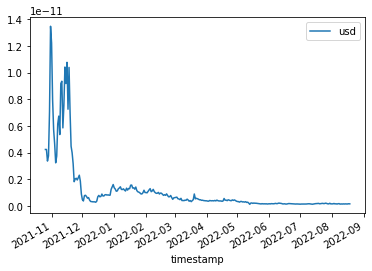

In [439]:
# panel = dfs.copy()
# dfs = panel.copy()
dfs.sort_values('timestamp', ascending=True, inplace=True)
dfs.loc[dfs['insider_tokenSymbol'] == 'WINRY']
dfs.loc[dfs['insider_tokenSymbol'] == 'WINRY'].set_index('timestamp').plot()

In [234]:
dfs.to_csv(f'{RES}/insider_trading/token_related_txn/token_price.csv', index=False)

# Events and Price

In [398]:
df1 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv')
df2 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_price.csv')
df1['event'] = pd.to_datetime(df1['event'])
df1['event'] = df1['event'].dt.strftime('%Y-%m-%d %H:%M:%S')
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'] = df2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df1.sample(3)
df2.sample(3)

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta,lp
138,0x1c7c73d1a0fdb917e5f125087a9c385eabebff8e69ce91d411c92a50091fd9cd-0,2300.52967579,390,NaN,NaN,0xdef1c0ded9bec7f1a1670819833240f027b25eff,NaN,NaN,2021-11-07 18:41:05+00:00,Wrapped Ether,KOROMARU,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd0d42005e7b3c0812b1268f0e5faf97ff2423651,0x1c7c73d1a0fdb917e5f125087a9c385eabebff8e69ce91d411c92a50091fd9cd,0xdb10247585fe1a9c721c6fc51b2ce5ea1a06599c,KOROMARU,KOROMARU,0xD0D42005e7B3c0812b1268F0e5FAF97Ff2423651,uniswapv2_ethereum,ethereum,0.00000000e+00,0.5,1.20677666e+13,2.08002871e+09,0xdb10247585fe1a9c721c6fc51b2ce5ea1a06599c,0xdb10247585fe1a9c721c6fc51b2ce5ea1a06599c,False,2300.52967579,2021-11-05 08:03:32,2 days 10:37:33,False
304,0x6b834b168f48d4340fd328d499897efe395f606628e6d0d5d4df1a75fcdba670-0,130.29651247,68,NaN,NaN,0x1111111254fb6c44bac0bed2854e76f90643097d,NaN,NaN,2022-03-05 10:49:23+00:00,Voxel X Network,Wrapped Ether,0x16cc8367055ae7e9157dbcb9d86fd6ce82522b31,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x6b834b168f48d4340fd328d499897efe395f606628e6d0d5d4df1a75fcdba670,0xad483dc8c4482eafdbebbc98ea66a89e461cfbd9,Voxel X Network,VXL,0x16cc8367055ae7e9157dbcb9d86fd6ce82522b31,uniswapv2_ethereum,ethereum,0.00000000e+00,2000.0,4.93499425e-02,0.00000000e+00,0xad483dc8c4482eafdbebbc98ea66a89e461cfbd9,0x1111111254fb6c44bac0bed2854e76f90643097d,False,-130.29651247,2022-03-04 07:22:24,1 days 03:26:59,False
484,0x7cced7466f771137a191565be07010ccd439e536e49170799be745e0ca781cd6-0,3362.63018129,211,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-03-28 06:00:57+00:00,Will Smith Inu,Wrapped Ether,0x361a8c6ef166ea5904a82f6e8b085f0ee4408a6b,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cced7466f771137a191565be07010ccd439e536e49170799be745e0ca781cd6,0xf590b43df3ea9412c3178b7b0e89682ca6c459a7,Will Smith Inu,WSI,0x361a8c6ef166ea5904a82f6e8b085f0ee4408a6b,uniswapv2_ethereum,ethereum,2.75823138e+09,0.0,0.00000000e+00,1.00000000e+00,0xf590b43df3ea9412c3178b7b0e89682ca6c459a7,0xf590b43df3ea9412c3178b7b0e89682ca6c459a7,False,3362.63018129,2022-03-30 14:07:03,-3 days +15:53:54,False


,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName
8339,2022-08-10 00:00:00,2.77615882e-02,0x16cc8367055ae7e9157dbcb9d86fd6ce82522b31,VXL,Voxel X Network
3548,2022-03-03 00:00:00,8.78560949e-15,0xab167E816E4d76089119900e941BEfdfA37d6b32,SHINJA,Shibnobi
2659,2022-01-23 00:00:00,1.15142647e-12,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu


In [425]:
df1.loc[df1['insider_tokenSymbol'] == 'BCPAY']

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta,lp
454,0xa234d7ac263bf26165d7ff9ce5e43d222e9208dabb2566bc810ba3d8e6693fb5-0,466.44602367,5,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-09 15:11:18+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xa234d7ac263bf26165d7ff9ce5e43d222e9208dabb2566bc810ba3d8e6693fb5,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,BCPAY FinTech,BCPAY,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,apeswap_binance,binance,0.00000000,13087.80389724,0.79853456,0.00000000,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,0x9e6e0505c8002f3240b04939c9a34b58ddc4600b,False,-466.44602367,2021-12-07 11:55:44,2 days 03:15:34,False
455,0xca4d74f8668bd79a18bd62189647c0a0891072a5f8ae1898b3b1c873352204a3-0,199.75024507,7,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-07 08:25:02+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xca4d74f8668bd79a18bd62189647c0a0891072a5f8ae1898b3b1c873352204a3,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,BCPAY FinTech,BCPAY,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,apeswap_binance,binance,6091.10397532,0.00000000,0.00000000,0.34145395,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,False,199.75024507,2021-12-07 11:55:44,-1 days +20:29:18,False
456,0xcd328562addf6d9bc108117d18e11a518afd6c232dc74c786bf8ef4762de7079-0,649.58883776,5,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-07 04:41:18+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0xcd328562addf6d9bc108117d18e11a518afd6c232dc74c786bf8ef4762de7079,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,BCPAY FinTech,BCPAY,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,apeswap_binance,binance,0.00000000,18001.65953000,1.10348015,0.00000000,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,False,-649.58883776,2021-12-07 11:55:44,-1 days +16:45:34,False
457,0x9b9dcee87a7440451d52b651e6eee5437d7ad2ed970b5edb4bf87153d0904b82-0,6648.33603774,9,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-07 08:11:12+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x9b9dcee87a7440451d52b651e6eee5437d7ad2ed970b5edb4bf87153d0904b82,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,BCPAY FinTech,BCPAY,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,apeswap_binance,binance,0.00000000,210000.00000000,11.35736546,0.00000000,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,False,-6648.33603774,2021-12-07 11:55:44,-1 days +20:15:28,False
458,0x0ed90f5cd8637c1920f9f19bec9fe55ad7efbd8f94d620d65508c861fc74f28c-0,2994.36738175,9,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-07 03:32:28+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x0ed90f5cd8637c1920f9f19bec9fe55ad7efbd8f94d620d65508c861fc74f28c,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,BCPAY FinTech,BCPAY,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,apeswap_binance,binance,0.00000000,80577.57383080,5.07811449,0.00000000,0xc9183977ee8b17d9f977704f1c58d76d7b4709e3,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,False,-2994.36738175,2021-12-07 11:55:44,-1 days +15:36:44,False
459,0x3f9b70249906b60c1807f609290413f8f462657460de48b972a0fabcca389c77-0,1675.88841160,13,NaN,NaN,0x3790c9b5a9b9d9aa1c69140a5f01a57c9b868e1e,NaN,NaN,2021-12-08 06:48:27+00:00,BCPAY FinTech,Wrapped BNB,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0x3f9b702

In [399]:
df2.sort_values(['insider_tokenSymbol', 'timestamp'], ascending=True, inplace=True)
df2['ret'] = df2.groupby(['insider_tokenSymbol'])['usd'].pct_change()
df2

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
4343,2022-04-04 00:00:00,7.28732076e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,NaN
4382,2022-04-05 00:00:00,7.28732076e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.00000000
4411,2022-04-06 00:00:00,7.53428232e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.03388921
4422,2022-04-07 00:00:00,4.94420022e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,-0.34377290
4466,2022-04-08 00:00:00,6.63003280e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.34097175
...,...,...,...,...,...,...
8476,2022-08-15 00:00:00,1.42461108e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.05626379
8498,2022-08-16 00:00:00,1.42070990e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.00273842
8512,2022-08-17 00:00:00,1.58827522e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.11794478
8549,2022-08-18 00:00:00,1.60024539e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.00753658


## Individual

Text(0.5, 1.0, 'APEX daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-04-01'

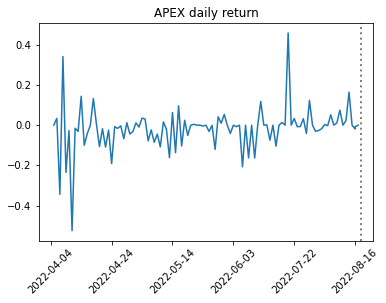

Text(0.5, 1.0, 'BCPAY daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-12-07'

'2021-11-24'

'2021-11-24'

'2021-11-24'

'2021-11-24'

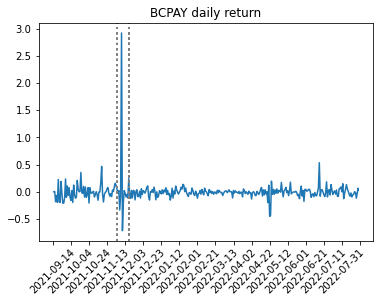

Text(0.5, 1.0, 'BINU daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-02-03'

'2022-02-03'

'2022-02-03'

'2022-02-03'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

'2021-12-30'

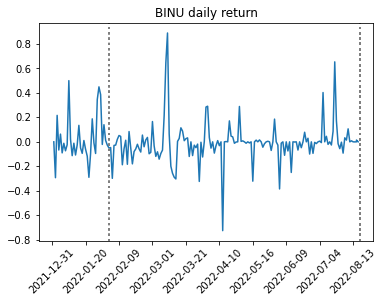

Text(0.5, 1.0, 'DBUY daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-01-19'

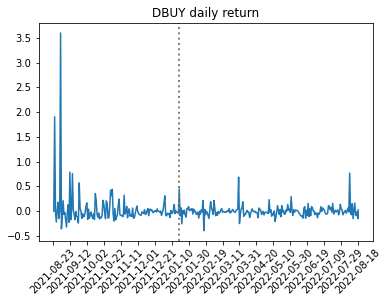

Text(0.5, 1.0, 'DXO daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-09-04'

'2021-09-04'

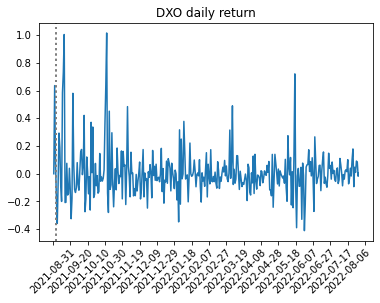

Text(0.5, 1.0, 'FABRIC daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

'2021-12-06'

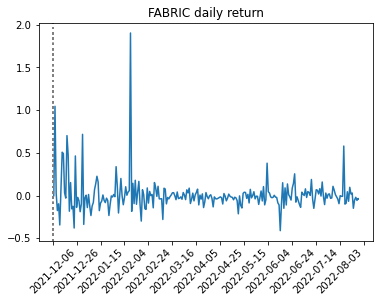

Text(0.5, 1.0, 'FLOKI daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-03-03'

'2022-03-03'

'2022-03-02'

'2022-03-02'

'2021-10-28'

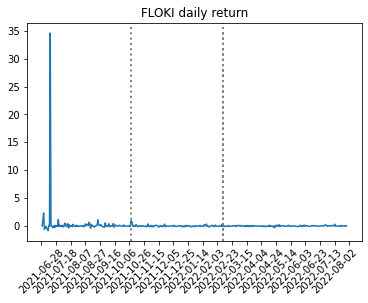

Text(0.5, 1.0, 'FRANK daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-03-20'

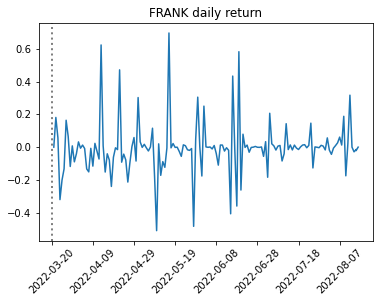

Text(0.5, 1.0, 'GAN daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-11-04'

'2021-11-03'

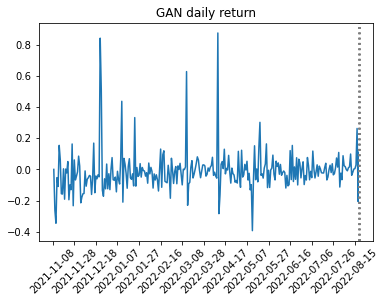

Text(0.5, 1.0, 'GARFIELD daily return')

(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-11-12'

'2021-11-12'

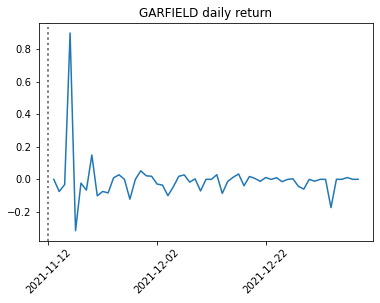

Text(0.5, 1.0, 'HEAL daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

'2022-03-03'

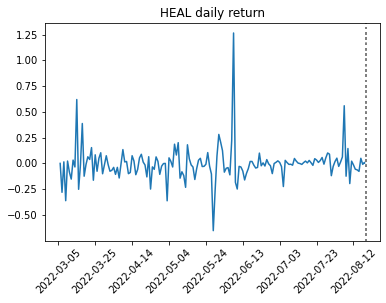

Text(0.5, 1.0, 'KIBA daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-04-29'

'2022-04-29'

'2022-04-26'

'2022-04-26'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

'2022-03-07'

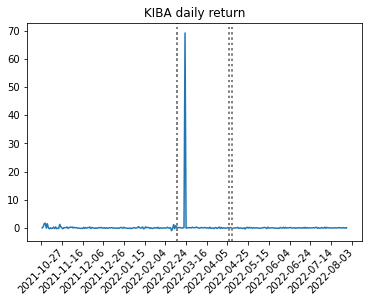

Text(0.5, 1.0, 'KOROMARU daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-11-15'

'2021-11-15'

'2021-11-15'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

'2021-11-05'

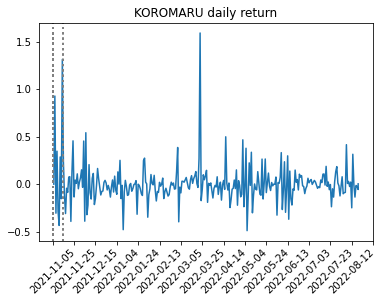

Text(0.5, 1.0, 'NEZUKO daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-10-24'

'2021-10-16'

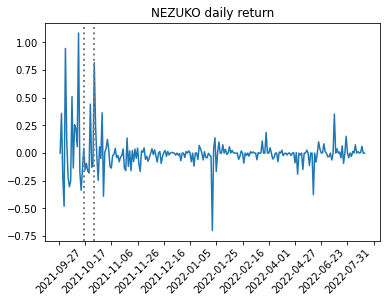

Text(0.5, 1.0, 'NIROS daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-01-12'

'2022-01-12'

'2022-01-12'

'2022-01-12'

'2022-01-12'

'2022-01-12'

'2022-01-07'

'2022-01-07'

'2022-01-07'

'2022-01-07'

'2022-01-07'

'2022-01-07'

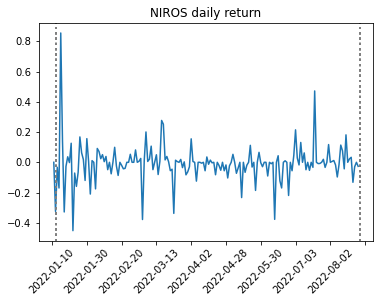

Text(0.5, 1.0, 'OKLP daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-04-21'

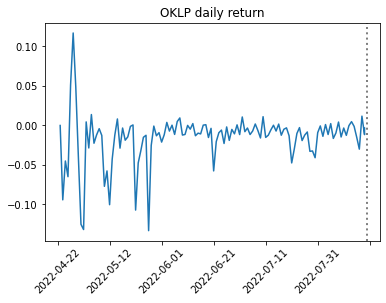

Text(0.5, 1.0, 'PFAN daily return')

(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-02-18'

'2022-02-17'

'2022-02-17'

'2022-02-17'

'2022-02-08'

'2022-02-08'

'2022-02-08'

'2022-02-08'

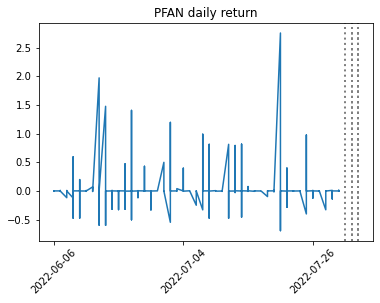

Text(0.5, 1.0, 'PLE daily return')

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.,
        180., 200., 220., 240., 260., 280., 300., 320., 340., 360., 380.,
        400., 420., 440., 460., 480.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-01-04'

'2022-01-04'

'2022-01-04'

'2022-01-03'

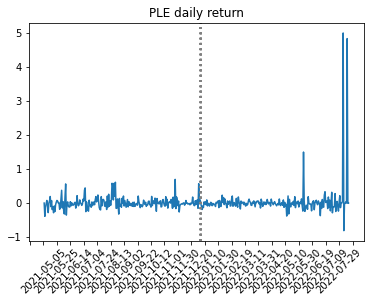

Text(0.5, 1.0, 'POOR daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-05-13'

'2022-05-12'

'2022-05-12'

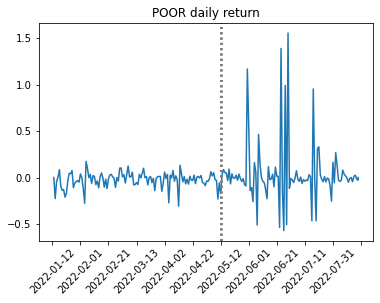

Text(0.5, 1.0, 'Puppy daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-11-09'

'2021-11-09'

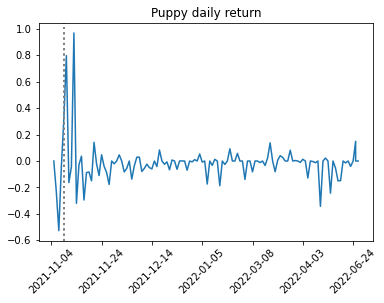

Text(0.5, 1.0, 'QUID daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-10-27'

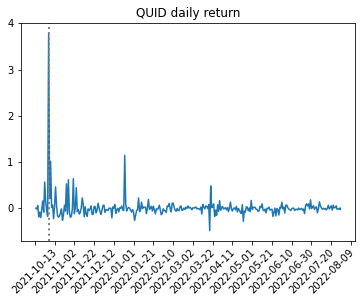

Text(0.5, 1.0, 'RUGPULL daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-11-01'

'2021-11-01'

'2021-11-01'

'2021-11-01'

'2021-11-01'

'2021-11-01'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

'2021-05-18'

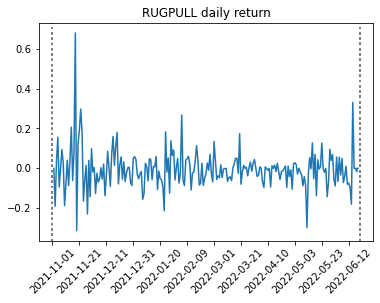

Text(0.5, 1.0, 'SAITANOBI daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-02-21'

'2022-02-16'

'2022-02-15'

'2022-02-10'

'2022-02-10'

'2022-02-10'

'2022-02-10'

'2022-02-07'

'2022-02-07'

'2022-02-07'

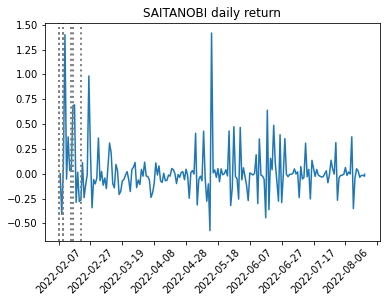

Text(0.5, 1.0, 'SFUND daily return')

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.,
        180., 200., 220., 240., 260., 280., 300., 320., 340., 360., 380.,
        400., 420., 440., 460., 480., 500., 520., 540.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

'2021-04-09'

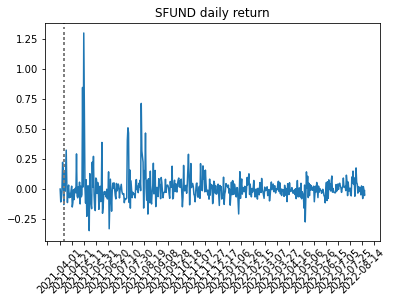

Text(0.5, 1.0, 'SHIBGF daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-04-25'

'2022-04-25'

'2022-04-13'

'2022-04-13'

'2022-04-13'

'2022-04-07'

'2022-04-07'

'2022-04-07'

'2022-04-07'

'2022-03-13'

'2022-03-10'

'2022-03-03'

'2022-03-03'

'2022-01-10'

'2022-01-10'

'2021-11-18'

'2021-11-18'

'2021-11-18'

'2021-11-18'

'2021-11-14'

'2021-11-14'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-11-06'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

'2021-10-30'

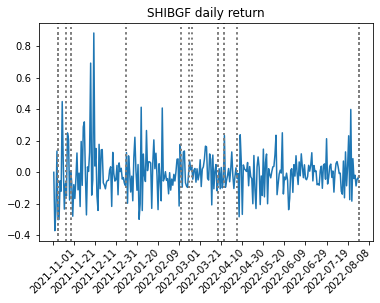

Text(0.5, 1.0, 'SHINJA daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-03-15'

'2022-03-15'

'2022-03-14'

'2022-03-14'

'2022-03-14'

'2022-03-14'

'2022-03-14'

'2022-03-14'

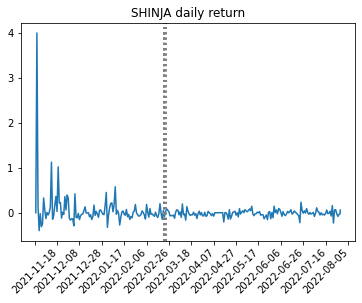

Text(0.5, 1.0, 'STORKS daily return')

(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-19'

'2022-01-17'

'2022-01-17'

'2022-01-17'

'2022-01-16'

'2022-01-16'

'2022-01-16'

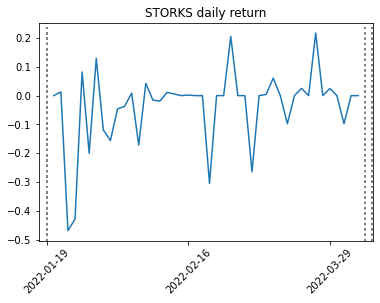

Text(0.5, 1.0, 'UNDEAD daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-05-01'

'2022-04-29'

'2022-04-27'

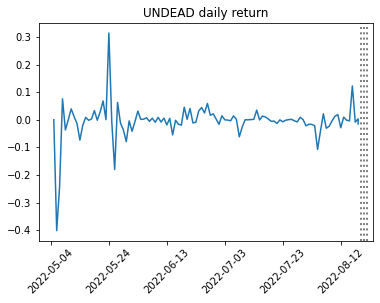

Text(0.5, 1.0, 'VXL daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2022-03-04'

'2022-03-04'

'2022-03-04'

'2022-03-04'

'2022-03-04'

'2022-03-04'

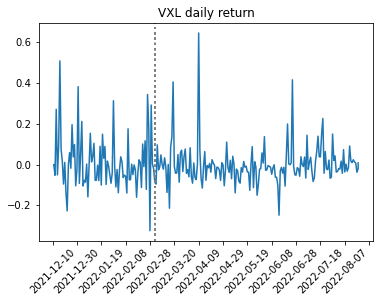

Text(0.5, 1.0, 'WEMP daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-10-09'

'2021-10-09'

'2021-10-09'

'2021-10-09'

'2021-10-09'

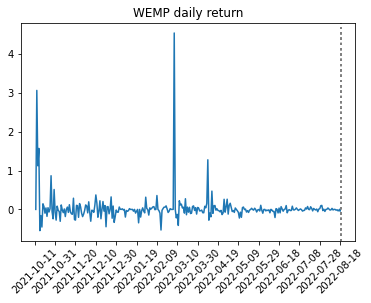

Text(0.5, 1.0, 'WHL daily return')

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.,
        180., 200., 220., 240., 260., 280., 300., 320., 340., 360., 380.,
        400., 420., 440., 460., 480., 500., 520., 540.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-02-22'

'2021-02-22'

'2021-02-22'

'2021-02-22'

'2021-02-21'

'2021-02-21'

'2021-02-21'

'2021-02-21'

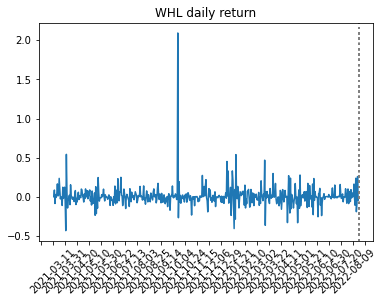

Text(0.5, 1.0, 'WINRY daily return')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-16'

'2021-12-15'

'2021-12-15'

'2021-12-15'

'2021-12-15'

'2021-12-15'

'2021-12-15'

'2021-12-15'

'2021-12-15'

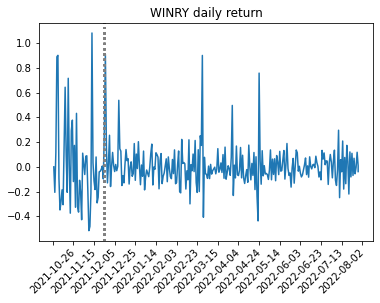

In [264]:
for idx, row in df2.drop_duplicates('insider_tokenSymbol').iterrows():
    insider_tokenSymbol = row['insider_tokenSymbol']
    fig, ax = plt.subplots()
    
    timestamp = df2.loc[df2['insider_tokenSymbol'] == insider_tokenSymbol, 'timestamp'].values
    ret = df2.loc[df2['insider_tokenSymbol'] == insider_tokenSymbol, 'ret'].values
    
    ax.plot(timestamp, ret)
    ax.set_title(f'{insider_tokenSymbol} daily return')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
    plt.xticks(rotation=45)
    
    events = df1.loc[df1['insider_tokenSymbol'] == insider_tokenSymbol, 'event'].values
    
    for event in events:
        event
        plt.axvline(x=event, color='grey', linestyle='dotted', linewidth=2)
        
    plt.show()

## Aggregate

In [336]:
df2['usd_-3'] = df2['usd'].shift(3)
df2['usd_1'] = df2['usd'].shift(-1)

df2['ret_-3'] = (df2['usd'] - df2['usd_-3']) / df2['usd_-3']
df2['ret_-3_1'] = (df2['usd_1'] - df2['usd_-3']) / df2['usd_-3']


df2

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret,usd_-3,ret_-3,usd_1,ret_-3_1
4343,2022-04-04 00:00:00,7.287321e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,NaN,NaN,NaN,7.287321e-04,NaN
4382,2022-04-05 00:00:00,7.287321e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.000000,NaN,NaN,7.534282e-04,NaN
4411,2022-04-06 00:00:00,7.534282e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.033889,NaN,NaN,4.944200e-04,NaN
4422,2022-04-07 00:00:00,4.944200e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,-0.343773,7.287321e-04,-0.321534,6.630033e-04,-0.090196
4466,2022-04-08 00:00:00,6.630033e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.340972,7.287321e-04,-0.090196,5.075134e-04,-0.303567
...,...,...,...,...,...,...,...,...,...,...
8476,2022-08-15 00:00:00,1.424611e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.056264,1.516375e-13,-0.060516,1.420710e-13,-0.063088
8498,2022-08-16 00:00:00,1.420710e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.002738,1.411217e-13,0.006727,1.588275e-13,0.125465
8512,2022-08-17 00:00:00,1.588275e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.117945,1.509544e-13,0.052156,1.600245e-13,0.060085
8549,2022-08-18 00:00:00,1.600245e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.007537,1.424611e-13,0.123286,1.539059e-13,0.080336


In [440]:
project = df2.drop_duplicates('insider_tokenSymbol').shape[0]
event_num = 0

positive = 0
negative = 0
nan = 0
no_info = 0
zero = 0

for idx, row in df2.drop_duplicates('insider_tokenSymbol').iterrows():
    insider_tokenSymbol = row['insider_tokenSymbol']
    
    
    events = df1.loc[df1['insider_tokenSymbol'] == insider_tokenSymbol, 'event'].unique()
    # event_num = event_num + len(events)
    
    for event in events:
        event_num += 1
        
        ret = df2.loc[(df2['insider_tokenSymbol'] == insider_tokenSymbol)&
                      (pd.to_datetime(df2['timestamp']) > pd.to_datetime(event) ) &
                      (pd.to_datetime(df2['timestamp']) < pd.to_datetime(event) + datetime.timedelta(days=1))]
        if ret.shape[0] == 0: no_info+= 1
        for ret_idx, ret_row in ret.iterrows():
            if ret_row['ret'] > 0: positive+= 1
            if ret_row['ret'] < 0: negative+= 1
            if ret_row['ret'] == 0: zero+= 1
            if np.isnan(ret_row['ret']): nan+= 1


print(f'Token Project Number: {project}')
print(f'Positive Return After Event: {positive}')
print(f'Negative Return After Event: {negative}')
print(f'Zero Return After Event: {zero}')
print(f'No info: {no_info+nan}')

print(f'Total Event Number: {event_num}')

Token Project Number: 32
Positive Return After Event: 23
Negative Return After Event: 29
Zero Return After Event: 10
No info: 26
Total Event Number: 88


In [350]:
print(f'Token Project Number: {project}')
print(f'Positive: {positive}')
print(f'Negative: {negative}')
print(f'Zero Return: {zero}')
print(f'No info: {event_num - positive - negative - zero}')

print(f'Total Event Number: {event_num}')

Token Project Number: 32
Positive: 32
Negative: 20
Zero Return: 0
No info: 36
Total Event Number: 88


## All Events

In [445]:
lst = pd.read_csv(f'{WD}tweet/list/list.csv')

# df1 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv')
df2 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_price.csv')
# df1['event'] = pd.to_datetime(df1['event'])
# df1['event'] = df1['event'].dt.strftime('%Y-%m-%d %H:%M:%S')
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'] = df2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

df2.sort_values(['insider_tokenSymbol', 'timestamp'], ascending=True, inplace=True)
df2['ret'] = df2.groupby(['insider_tokenSymbol'])['usd'].pct_change()
df2['usd_-3'] = df2['usd'].shift(3)
df2['usd_1'] = df2['usd'].shift(-1)

df2['ret_-3'] = (df2['usd'] - df2['usd_-3']) / df2['usd_-3']
df2['ret_-3_1'] = (df2['usd_1'] - df2['usd_-3']) / df2['usd_-3']

project = df2.drop_duplicates('insider_tokenSymbol').shape[0]
event_num = 0

positive = 0
negative = 0
nan = 0
no_info = 0
zero = 0

st = pd.read_csv(f'{WD}tweet/list/list.csv')

for idx, row in df2.drop_duplicates('insider_tokenSymbol').iterrows():
    insider_tokenSymbol = row['insider_tokenSymbol']
    index = lst.loc[lst['insider_tokenSymbol'] == insider_tokenSymbol, 'index'].values[0]
    dft = pd.read_csv(f'{WD}tweet/csv/tweet_{index}.csv')
    dft['text'] = dft['text'].apply(lambda x: x.lower())
    dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
    dft['timestamp'] = pd.to_datetime(dft['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
    events = dft['timestamp'].unique()
    
    for event in events:
        event_num += 1
        ret = df2.loc[(df2['insider_tokenSymbol'] == insider_tokenSymbol)&
                      (pd.to_datetime(df2['timestamp']) > pd.to_datetime(event) ) &
                      (pd.to_datetime(df2['timestamp']) < pd.to_datetime(event) + datetime.timedelta(days=1))]
        if ret.shape[0] == 0: no_info+= 1
        for ret_idx, ret_row in ret.iterrows():
            if ret_row['ret_-3_1'] > 0: positive+= 1
            if ret_row['ret_-3_1'] < 0: negative+= 1
            if ret_row['ret_-3_1'] == 0: zero+= 1
            if np.isnan(ret_row['ret_-3_1']): nan+= 1


print(f'Token Project Number: {project}')
print(f'Positive Return After Event: {positive}')
print(f'Negative Return After Event: {negative}')
print(f'Zero Return After Event: {zero}')
print(f'No info: {no_info+nan}')

print(f'Total Event Number: {event_num}')

Token Project Number: 32
Positive Return After Event: 151
Negative Return After Event: 187
Zero Return After Event: 0
No info: 71
Total Event Number: 409


# Case Study: FLOKI

In [420]:
df1 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv')
df2 = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_price.csv')
df1['event'] = pd.to_datetime(df1['event'])
df1['event'] = df1['event'].dt.strftime('%Y-%m-%d %H:%M:%S')
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'] = df2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df2.sort_values(['insider_tokenSymbol', 'timestamp'], ascending=True, inplace=True)
df2['ret'] = df2.groupby(['insider_tokenSymbol'])['usd'].pct_change()
df1
df2

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta,lp
0,0xa10e2f02a43b90a73846a19c6e333f70b21f6fcb7fd871cce87428c348cbce6e-0,3231.68498746,403,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-01-18 08:49:24+00:00,STORKS TOKEN,Wrapped Ether,0x7ab018b6bba681a0d3555797ea36afcdbe1f53c6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa10e2f02a43b90a73846a19c6e333f70b21f6fcb7fd871cce87428c348cbce6e,0x0d8e53e2deb07200eae7420978220c57c0867d65,STORKS TOKEN,STORKS,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,uniswapv2_ethereum,ethereum,6.84606192e+07,5.66521743e+05,0.00000000,1.00000000e+00,0x0d8e53e2deb07200eae7420978220c57c0867d65,0x0d8e53e2deb07200eae7420978220c57c0867d65,False,3231.68498746,2022-01-19 14:00:10,-2 days +18:49:14,False
1,0x58133ed928734437b8c09a15a28008dd3e9fa188d62f215788dfd0d2fc526644-0,2905.46867821,127,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2022-01-22 01:25:23+00:00,STORKS TOKEN,Wrapped Ether,0x7ab018b6bba681a0d3555797ea36afcdbe1f53c6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x58133ed928734437b8c09a15a28008dd3e9fa188d62f215788dfd0d2fc526644,0x0d8e53e2deb07200eae7420978220c57c0867d65,STORKS TOKEN,STORKS,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,uniswapv2_ethereum,ethereum,0.00000000e+00,2.04283466e+08,1.15600710,0.00000000e+00,0x0d8e53e2deb07200eae7420978220c57c0867d65,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,False,-2905.46867821,2022-01-19 14:00:10,2 days 11:25:13,False
2,0xc2a91eef0f5653a8dd5201333c5e4b2d72d2626df3a2872ef5da10e4946057a5-0,1276.49294322,408,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-01-18 08:51:38+00:00,STORKS TOKEN,Wrapped Ether,0x7ab018b6bba681a0d3555797ea36afcdbe1f53c6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc2a91eef0f5653a8dd5201333c5e4b2d72d2626df3a2872ef5da10e4946057a5,0x0d8e53e2deb07200eae7420978220c57c0867d65,STORKS TOKEN,STORKS,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,uniswapv2_ethereum,ethereum,2.58905338e+07,2.10923700e+05,0.00000000,4.00000000e-01,0x0d8e53e2deb07200eae7420978220c57c0867d65,0x0d8e53e2deb07200eae7420978220c57c0867d65,False,1276.49294322,2022-01-19 14:00:10,-2 days +18:51:28,False
3,0xb4dc0b533c00400f806d23be9e379ca7fefac4c9d026089e591d47ddd248ed26-0,955.05303252,99,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-01-18 08:53:09+00:00,STORKS TOKEN,Wrapped Ether,0x7ab018b6bba681a0d3555797ea36afcdbe1f53c6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xb4dc0b533c00400f806d23be9e379ca7fefac4c9d026089e591d47ddd248ed26,0x0d8e53e2deb07200eae7420978220c57c0867d65,STORKS TOKEN,STORKS,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,uniswapv2_ethereum,ethereum,1.88940434e+07,1.52154493e+05,0.00000000,3.00000000e-01,0x0d8e53e2deb07200eae7420978220c57c0867d65,0x0d8e53e2deb07200eae7420978220c57c0867d65,False,955.05303252,2022-01-19 14:00:10,-2 days +18:52:59,False
4,0xa10e2f02a43b90a73846a19c6e333f70b21f6fcb7fd871cce87428c348cbce6e-0,3231.68498746,403,NaN,NaN,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,NaN,NaN,2022-01-18 08:49:24+00:00,STORKS TOKEN,Wrapped Ether,0x7ab018b6bba681a0d3555797ea36afcdbe1f53c6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa10e2f02a43b90a73846a19c6e333f70b21f6fcb7fd871cce87428c348cbce6e,0x0d8e53e2deb07200eae7420978220c57c0867d65,STORKS TOKEN,STORKS,0x7Ab018b6Bba681a0d3555797Ea36AFCDBe1f53C6,uniswapv2_ethereum,ethereum,6.84606192e+07,5.66521743e+05,0.00000000,1.00000000e+00,0x0d8e53e2deb07200eae7420978220c57c0867d65,0x0d8e53e2deb07200eae7420978220c57c0867d65,False,3231.68498746,2022-01-19 13:36:37,-2 days +19:12:47,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0xde0922f4fe2bfbc830f78a6edca28a28ec99058e542140aa684c15bed149974d-0,2537.48550307,276,NaN,NaN,0x7a2

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
4343,2022-04-04 00:00:00,7.28732076e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,NaN
4382,2022-04-05 00:00:00,7.28732076e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.00000000
4411,2022-04-06 00:00:00,7.53428232e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.03388921
4422,2022-04-07 00:00:00,4.94420022e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,-0.34377290
4466,2022-04-08 00:00:00,6.63003280e-04,0x6942833D39EBEF9De86f32e43ce2A27E1db90872,APEX,Ape-X Predator,0.34097175
...,...,...,...,...,...,...
8476,2022-08-15 00:00:00,1.42461108e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.05626379
8498,2022-08-16 00:00:00,1.42070990e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,-0.00273842
8512,2022-08-17 00:00:00,1.58827522e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.11794478
8549,2022-08-18 00:00:00,1.60024539e-13,0x1a87077C4F834884691B8ba4fc808D2eC93A9F30,WINRY,Winry Inu,0.00753658


<AxesSubplot:xlabel='timestamp'>

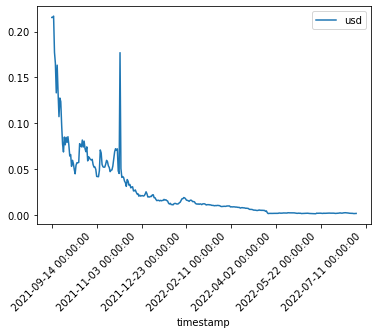

In [421]:
df2.loc[df2['insider_tokenSymbol'] == 'BCPAY', ['usd', 'timestamp']].set_index('timestamp').plot(rot=45)

In [422]:
df2.loc[df2['insider_tokenSymbol'] == 'BCPAY']

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
594,2021-09-14 00:00:00,0.21536829,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,NaN
600,2021-09-15 00:00:00,0.21536829,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.00000000
611,2021-09-16 00:00:00,0.21680170,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.00665565
616,2021-09-17 00:00:00,0.17729170,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.18224026
621,2021-09-18 00:00:00,0.16527180,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.06779733
...,...,...,...,...,...,...
8457,2022-08-15 00:00:00,0.00159903,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.00858994
8499,2022-08-16 00:00:00,0.00141350,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.11602191
8519,2022-08-17 00:00:00,0.00137697,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.02584593
8541,2022-08-18 00:00:00,0.00146853,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.06649144


array(['2021-12-07 11:55:44', '2021-11-24 12:57:30'], dtype=object)

Text(0.5, 1.0, 'BCPAY daily return')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Announcement Date:2021-12-07 11:55:44


,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
1618,2021-12-05 00:00:00,0.03502236,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.04771922
1637,2021-12-06 00:00:00,0.03103441,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.11386857
1649,2021-12-07 00:00:00,0.03849551,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.24041378
1671,2021-12-08 00:00:00,0.03668970,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.04690968
1691,2021-12-09 00:00:00,0.03227245,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.12039495
1718,2021-12-10 00:00:00,0.03310650,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.02584427


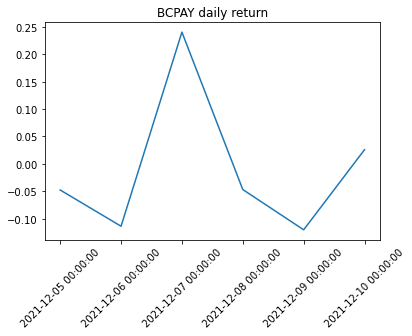

Text(0.5, 1.0, 'BCPAY daily return')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Announcement Date:2021-11-24 12:57:30


,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
1372,2021-11-22 00:00:00,0.06156577,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.15536812
1382,2021-11-23 00:00:00,0.06881502,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.11774805
1412,2021-11-24 00:00:00,0.07212781,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.04814046
1429,2021-11-25 00:00:00,0.07034205,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.02475820
1448,2021-11-26 00:00:00,0.07197587,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,0.02322673
1465,2021-11-27 00:00:00,0.04787331,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.33487001


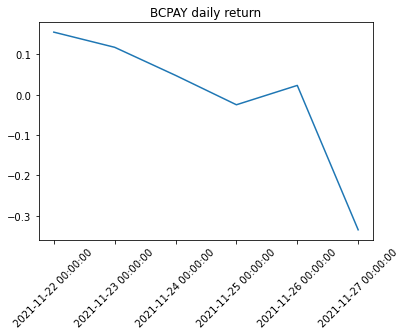

In [423]:
insider_tokenSymbol = 'BCPAY'

events = df1.loc[df1['insider_tokenSymbol'] == insider_tokenSymbol, 'event'].unique()
events

for event in events:
    
    ret = df2.loc[(df2['insider_tokenSymbol'] == insider_tokenSymbol)&
                  (pd.to_datetime(df2['timestamp']) > pd.to_datetime(event) - datetime.timedelta(days=3)) &
                  (pd.to_datetime(df2['timestamp']) < pd.to_datetime(event) + datetime.timedelta(days=3))]
    
    fig, ax = plt.subplots()
    
    timestamp = ret['timestamp'].values
    ret = ret['ret'].values
    
    ax.plot(timestamp, ret)
    ax.set_title(f'{insider_tokenSymbol} daily return')
    plt.xticks(rotation=45)
    
    # plt.axvline(x=event, color='grey', linestyle='dotted', linewidth=2)
    
    print(f'Announcement Date:{event}')
    df2.loc[(df2['insider_tokenSymbol'] == insider_tokenSymbol)&
                  (pd.to_datetime(df2['timestamp']) > pd.to_datetime(event) - datetime.timedelta(days=3)) &
                  (pd.to_datetime(df2['timestamp']) < pd.to_datetime(event) + datetime.timedelta(days=3))]
    
    plt.show()

In [424]:
event_num = 0

positive = 0
negative = 0
nan = 0
no_info = 0
zero = 0


insider_tokenSymbol = 'BCPAY'


events = df1.loc[df1['insider_tokenSymbol'] == insider_tokenSymbol, 'event'].unique()
# event_num = event_num + len(events)

for event in events:
    event_num += 1
    ret = df2.loc[(df2['insider_tokenSymbol'] == insider_tokenSymbol)&
                  (pd.to_datetime(df2['timestamp']) > pd.to_datetime(event) ) &
                  (pd.to_datetime(df2['timestamp']) < pd.to_datetime(event) + datetime.timedelta(days=1))]
    if ret.shape[0] == 0: no_info+= 1
    event
    ret
    for ret_idx, ret_row in ret.iterrows():
        if ret_row['ret'] > 0: positive+= 1
        if ret_row['ret'] < 0: negative+= 1
        if ret_row['ret'] == 0: zero+= 1
        if ret_row['ret'] == 'NaN': nan+= 1


print(f'Positive Return After Event: {positive}')
print(f'Negative Return After Event: {negative}')
print(f'Zero Return After Event: {zero}')
print(f'No info: {no_info+nan}')

print(f'Total Event Number: {event_num}')

'2021-12-07 11:55:44'

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
1671,2021-12-08 00:00:00,0.0366897,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.04690968


'2021-11-24 12:57:30'

,timestamp,usd,insider_contractAddress,insider_tokenSymbol,insider_tokenName,ret
1429,2021-11-25 00:00:00,0.07034205,0x21f1ce0fcf1e9e39f8e79b7762801e8096d9f6cd,BCPAY,BCPAY FinTech,-0.0247582


Positive Return After Event: 0
Negative Return After Event: 2
Zero Return After Event: 0
No info: 0
Total Event Number: 2
